<a href="https://colab.research.google.com/github/xAn-x/Vision-Lab/blob/master/06%20DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
DEVICE=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda')

# Dense Nets
**Dense Nets** explore the idea that,ResNet decomposes into a simple linear term and a more complex nonlinear one. What if we wanted to capture (not necessarily add) information beyond two terms?

DenseNet is that in the latter case outputs are concatenated ,rather than added.
As a result, we perform a mapping from to its values after applying an increasingly complex sequence of functions:
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow data-mjx-texclass="ORD">
    <mi mathvariant="bold">x</mi>
  </mrow>
  <mo accent="false" stretchy="false">&#x2192;</mo>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="bold">x</mi>
    </mrow>
    <mo>,</mo>
    <msub>
      <mi>f</mi>
      <mn>1</mn>
    </msub>
    <mo stretchy="false">(</mo>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="bold">x</mi>
    </mrow>
    <mo stretchy="false">)</mo>
    <mo>,</mo>
    <msub>
      <mi>f</mi>
      <mn>2</mn>
    </msub>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">(</mo>
      <mrow data-mjx-texclass="INNER">
        <mo data-mjx-texclass="OPEN">[</mo>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">x</mi>
        </mrow>
        <mo>,</mo>
        <msub>
          <mi>f</mi>
          <mn>1</mn>
        </msub>
        <mrow data-mjx-texclass="INNER">
          <mo data-mjx-texclass="OPEN">(</mo>
          <mrow data-mjx-texclass="ORD">
            <mi mathvariant="bold">x</mi>
          </mrow>
          <mo data-mjx-texclass="CLOSE">)</mo>
        </mrow>
        <mo data-mjx-texclass="CLOSE">]</mo>
      </mrow>
      <mo data-mjx-texclass="CLOSE">)</mo>
    </mrow>
    <mo>,</mo>
    <msub>
      <mi>f</mi>
      <mn>3</mn>
    </msub>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">(</mo>
      <mrow data-mjx-texclass="INNER">
        <mo data-mjx-texclass="OPEN">[</mo>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">x</mi>
        </mrow>
        <mo>,</mo>
        <msub>
          <mi>f</mi>
          <mn>1</mn>
        </msub>
        <mrow data-mjx-texclass="INNER">
          <mo data-mjx-texclass="OPEN">(</mo>
          <mrow data-mjx-texclass="ORD">
            <mi mathvariant="bold">x</mi>
          </mrow>
          <mo data-mjx-texclass="CLOSE">)</mo>
        </mrow>
        <mo>,</mo>
        <msub>
          <mi>f</mi>
          <mn>2</mn>
        </msub>
        <mrow data-mjx-texclass="INNER">
          <mo data-mjx-texclass="OPEN">(</mo>
          <mrow data-mjx-texclass="INNER">
            <mo data-mjx-texclass="OPEN">[</mo>
            <mrow data-mjx-texclass="ORD">
              <mi mathvariant="bold">x</mi>
            </mrow>
            <mo>,</mo>
            <msub>
              <mi>f</mi>
              <mn>1</mn>
            </msub>
            <mrow data-mjx-texclass="INNER">
              <mo data-mjx-texclass="OPEN">(</mo>
              <mrow data-mjx-texclass="ORD">
                <mi mathvariant="bold">x</mi>
              </mrow>
              <mo data-mjx-texclass="CLOSE">)</mo>
            </mrow>
            <mo data-mjx-texclass="CLOSE">]</mo>
          </mrow>
          <mo data-mjx-texclass="CLOSE">)</mo>
        </mrow>
        <mo data-mjx-texclass="CLOSE">]</mo>
      </mrow>
      <mo data-mjx-texclass="CLOSE">)</mo>
    </mrow>
    <mo>,</mo>
    <mo>&#x2026;</mo>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
  <mo>.</mo>
</math>

---

<br>
<img src="https://www.researchgate.net/publication/353952274/figure/fig3/AS:1057797202538498@1629209914410/Dense-Net-architecture-for-the-feature-extraction-A-indicates-five-layer-Dense-Net.png"/>
<br>


The main components that comprise a DenseNet are dense blocks and transition layers. The former define how the inputs and outputs are concatenated, while the latter control the number of channels so that it is not too large, since the expansion
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mi mathvariant="bold">x</mi>
  </mrow>
  <mo accent="false" stretchy="false">&#x2192;</mo>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="bold">x</mi>
    </mrow>
    <mo>,</mo>
    <msub>
      <mi>f</mi>
      <mn>1</mn>
    </msub>
    <mo stretchy="false">(</mo>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="bold">x</mi>
    </mrow>
    <mo stretchy="false">)</mo>
    <mo>,</mo>
    <msub>
      <mi>f</mi>
      <mn>2</mn>
    </msub>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">(</mo>
      <mrow data-mjx-texclass="INNER">
        <mo data-mjx-texclass="OPEN">[</mo>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">x</mi>
        </mrow>
        <mo>,</mo>
        <msub>
          <mi>f</mi>
          <mn>1</mn>
        </msub>
        <mrow data-mjx-texclass="INNER">
          <mo data-mjx-texclass="OPEN">(</mo>
          <mrow data-mjx-texclass="ORD">
            <mi mathvariant="bold">x</mi>
          </mrow>
          <mo data-mjx-texclass="CLOSE">)</mo>
        </mrow>
        <mo data-mjx-texclass="CLOSE">]</mo>
      </mrow>
      <mo data-mjx-texclass="CLOSE">)</mo>
    </mrow>
    <mo>,</mo>
    <mo>&#x2026;</mo>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
</math> can be quite high-dimensional.

In [ ]:
class ConvBlock(nn.Module):
  def __init__(self,out_channels,filter_size,**kwargs):
    super().__init__()
    self.conv_block=nn.Sequential(
      nn.LazyConv2d(out_channels,filter_size,**kwargs),
      nn.ReLU(inplace=True),
      nn.LazyBatchNorm2d()
    )

  def forward(self,X):
    return self.conv_block(X)



class DenseBlock(nn.Module):
  def __init__(self,conv_config):
    super().__init__()
    dense_block=[]
    for config in conv_config:
      out_channels,filter_size=config
      dense_block.append(ConvBlock(out_channels,filter_size,padding='same'))
    self.dense_block=nn.ModuleList(dense_block)

  def forward(self,X):
    for block in self.dense_block:
      out=block(X)
      X=torch.cat([X,out],dim=1) # along channel dim
    return X

class TransistionBlock(nn.Module):
  def __init__(self,out_channels):
    super().__init__()
    self.transisition_block=nn.Sequential(
      nn.LazyConv2d(out_channels,1,padding='same'),
      nn.MaxPool2d(2,2)
    )

  def forward(self,X):
    return self.transisition_block(X)

In [ ]:
dense_block=DenseBlock([(16,5),(64,3),(128,3),(128,3),(256,3)])
transistion_block=TransistionBlock(128)


imgs=torch.randn(3,3,64,64)

out=dense_block(imgs)
print(f"Dense-Ouput:{out.shape}")

out=transistion_block(imgs)
print(f"Transistion-Ouput:{out.shape}")

Dense-Ouput:torch.Size([3, 595, 64, 64])
Transistion-Ouput:torch.Size([3, 128, 32, 32])


In [ ]:
class DenseNet(nn.Module):
  def __init__(self,in_channels,num_classes,dense_config):
    """
    dense_config[i] : Configuration for ith dense block :(conv_config_0,conv_config_1,...)
    conv_config[i][j]: conv config for jth block of ith dense block : (out_channels,filter_size)
    """
    super().__init__()
    feature_extractor=[ConvBlock(16,7)]
    in_channels=16
    for config in dense_config:
      feature_extractor.append(DenseBlock(config))
      out_channels=config[-1][0]
      feature_extractor.append(TransistionBlock(out_channels))

    self.feature_extractor=nn.Sequential(*feature_extractor)

    self.flatten=nn.AdaptiveAvgPool2d(1)

    self.fc=nn.Sequential(
      nn.LazyLinear(100),
      nn.LeakyReLU(inplace=True),
      nn.LazyBatchNorm1d(),
      nn.LazyLinear(num_classes)
    )


  def forward(self,X):
    X=self.feature_extractor(X)
    X=self.flatten(X)
    X=X.reshape(X.shape[0],-1)
    X=self.fc(X)
    return X


In [ ]:
model=DenseNet(3,10,[
  [(16,5),(32,3),(64,3),(64,3)],
  [(64,3),(64,1),(32,3)],
]).to(DEVICE)

In [ ]:
model

DenseNet(
  (feature_extractor): Sequential(
    (0): ConvBlock(
      (conv_block): Sequential(
        (0): LazyConv2d(0, 16, kernel_size=(7, 7), stride=(1, 1))
        (1): ReLU(inplace=True)
        (2): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): DenseBlock(
      (dense_block): ModuleList(
        (0): ConvBlock(
          (conv_block): Sequential(
            (0): LazyConv2d(0, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
            (1): ReLU(inplace=True)
            (2): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
        (1): ConvBlock(
          (conv_block): Sequential(
            (0): LazyConv2d(0, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
            (1): ReLU(inplace=True)
            (2): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
        (2-3): 2 x ConvBlock(
       

In [ ]:
from torchsummary import summary
summary(model,(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 58, 58]           2,368
              ReLU-2           [-1, 16, 58, 58]               0
       BatchNorm2d-3           [-1, 16, 58, 58]              32
         ConvBlock-4           [-1, 16, 58, 58]               0
            Conv2d-5           [-1, 16, 58, 58]           6,416
              ReLU-6           [-1, 16, 58, 58]               0
       BatchNorm2d-7           [-1, 16, 58, 58]              32
         ConvBlock-8           [-1, 16, 58, 58]               0
            Conv2d-9           [-1, 32, 58, 58]           9,248
             ReLU-10           [-1, 32, 58, 58]               0
      BatchNorm2d-11           [-1, 32, 58, 58]              64
        ConvBlock-12           [-1, 32, 58, 58]               0
           Conv2d-13           [-1, 64, 58, 58]          36,928
             ReLU-14           [-1, 64,

In [ ]:
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split
from torchvision import transforms as T
from torchvision.datasets import CIFAR10

In [ ]:
MEAN,STD=(0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
transforms=T.Compose([
    T.ToTensor(),
    T.Resize((64,64)),
    T.Normalize(MEAN,STD)  # Normalize with mean and std
])

train_ds=CIFAR10(root="./data",download=True,train=True,transform=transforms)
val_ds=CIFAR10(root="./data",download=False,train=False,transform=transforms)

100%|██████████| 170498071/170498071 [00:04<00:00, 34402523.11it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
train_dl=DataLoader(train_ds,batch_size=64,shuffle=True,pin_memory=True,num_workers=2)
val_dl=DataLoader(val_ds,batch_size=128,shuffle=False,pin_memory=True,num_workers=2)

In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np

def denormalize(tensor, mean=MEAN, std=STD):
    mean = torch.tensor(mean).to(tensor.device).view(1, -1, 1, 1)
    std = torch.tensor(std).to(tensor.device).view(1, -1, 1, 1)

    denorm_tensor = tensor * std + mean
    return denorm_tensor

def visualize_batch(dataloader, mean=MEAN, std=STD):
    images, labels = next(iter(dataloader))
    denorm_images = denormalize(images, mean=mean, std=std)
    grid = make_grid(denorm_images)
    npimg = grid.numpy()
    plt.figure(figsize=(16,16))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

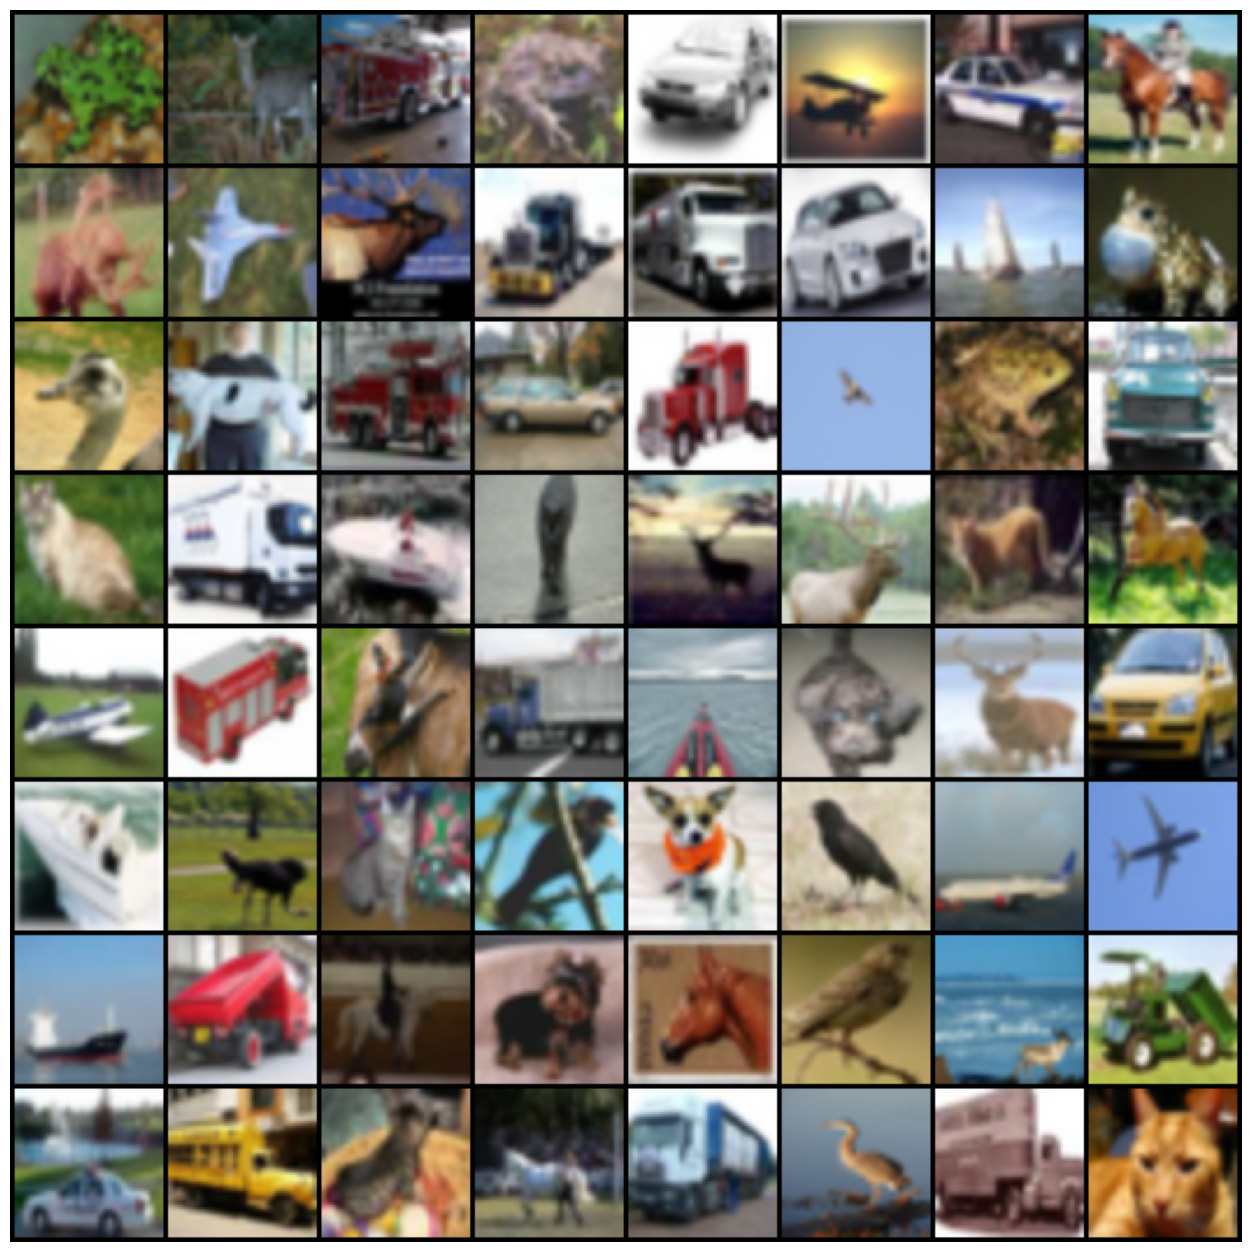

In [ ]:
visualize_batch(train_dl)

In [ ]:
from tqdm import tqdm

def train_model(model, train_dataloader, val_dataloader, epochs, device, optimizer, criterion):
  train_loss = []
  val_loss = []
  train_accuracy = []
  val_accuracy = []

  for epoch in range(epochs):
    model.train()
    total_correct_train = 0
    total_train_samples = 0
    total_train_loss = 0.0

    print(f"Epoch {epoch + 1}/{epochs}")
    for batch in tqdm(train_dataloader, desc="Training", leave=False):
      images, labels = batch
      images, labels = images.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels.view(-1))
      loss.backward()
      optimizer.step()

      total_train_loss += loss.item()

      _, predicted = torch.max(outputs.data, 1)
      total_correct_train += (predicted == labels).sum().item()
      total_train_samples += labels.size(0)

    train_loss.append(total_train_loss / len(train_dataloader))
    train_accuracy.append(total_correct_train / total_train_samples)

    model.eval()
    total_correct_val = 0
    total_val_samples = 0
    total_val_loss = 0.0

    with torch.no_grad():
      for batch in tqdm(val_dataloader, desc="Validation", leave=False):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels.view(-1))

        total_val_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_correct_val += (predicted == labels).sum().item()
        total_val_samples += labels.size(0)

    val_loss.append(total_val_loss / len(val_dataloader))
    val_accuracy.append(total_correct_val / total_val_samples)

    print(f"Epoch: {epoch + 1}")
    print(f"Training Loss: {train_loss[-1]:.4f}")
    print(f"Training Accuracy: {train_accuracy[-1]:.4f}")
    print(f"Validation Loss: {val_loss[-1]:.4f}")
    print(f"Validation Accuracy: {val_accuracy[-1]:.4f}\n")

  return {
      "train_loss": train_loss,
      "val_loss": val_loss,
      "train_accuracy": train_accuracy,
      "val_accuracy": val_accuracy
  }


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = F.cross_entropy

hist = train_model(model, train_dl, val_dl, epochs=10, device=DEVICE, optimizer=optimizer, criterion=criterion)

Epoch 1/10


Epoch: 1
Training Loss: 1.4904
Training Accuracy: 0.4608
Validation Loss: 1.2558
Validation Accuracy: 0.5457

Epoch 2/10


Epoch: 2
Training Loss: 1.1349
Training Accuracy: 0.5964
Validation Loss: 1.0739
Validation Accuracy: 0.6150

Epoch 3/10


Epoch: 3
Training Loss: 0.9713
Training Accuracy: 0.6585
Validation Loss: 0.9296
Validation Accuracy: 0.6663

Epoch 4/10


Epoch: 4
Training Loss: 0.8672
Training Accuracy: 0.6954
Validation Loss: 0.9699
Validation Accuracy: 0.6592

Epoch 5/10


Epoch: 5
Training Loss: 0.7888
Training Accuracy: 0.7252
Validation Loss: 0.8288
Validation Accuracy: 0.7053

Epoch 6/10


Epoch: 6
Training Loss: 0.7247
Training Accuracy: 0.7475
Validation Loss: 0.8264
Validation Accuracy: 0.7145

Epoch 7/10


Epoch: 7
Training Loss: 0.6712
Training Accuracy: 0.7672
Validation Loss: 0.8279
Validation Accuracy: 0.7121

Epoch 8/10


Epoch: 8
Training Loss: 0.6240
Training Accuracy: 0.7831
Validation Loss: 0.7279
Validation Accuracy: 0.7460

Epoch 9/10


Epoch: 9
Training Loss: 0.5798
Training Accuracy: 0.7975
Validation Loss: 0.7579
Validation Accuracy: 0.7428

Epoch 10/10


Epoch: 10
Training Loss: 0.5386
Training Accuracy: 0.8123
Validation Loss: 0.7109
Validation Accuracy: 0.7511



In [ ]:
def visualize_metric(hist,metric):
  plt.plot(hist[f"train_{metric}"],"r*--",label=f"train_{metric}")
  plt.plot(hist[f"val_{metric}"],"b*--",label=f"val_{metric}")
  plt.legend()

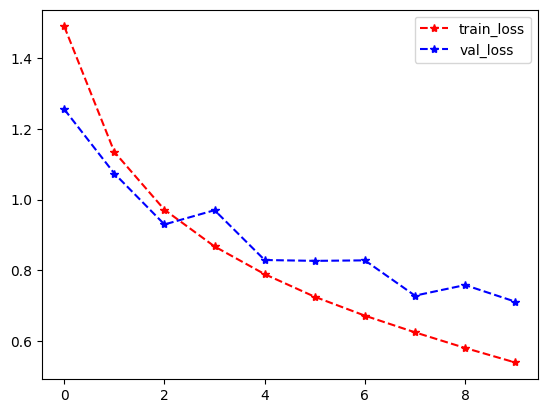

In [ ]:
visualize_metric(hist,"loss")

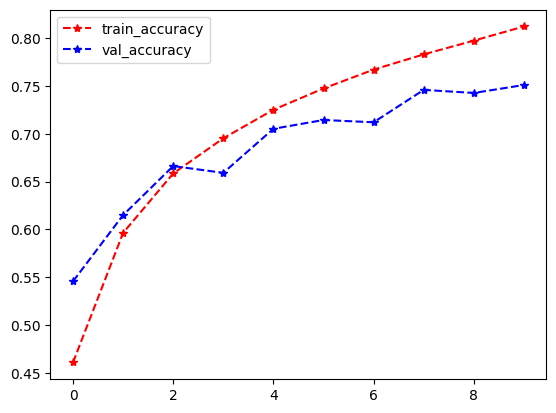

In [ ]:
visualize_metric(hist,"accuracy")
